In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [239]:
df = pd.read_csv('./DataSets/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [240]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Feature Engineering

*Converting Categorical data into numerical*

In [241]:
Male = pd.get_dummies(df["sex"], drop_first=True).astype(int)

Male

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [242]:
smoker = pd.get_dummies(df["smoker"], drop_first=True).astype(int)

smoker

,yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [243]:
df.drop(["sex","smoker"], axis=1, inplace=True)

df.head()

,age,bmi,children,region,charges
0,19,27.900,0,southwest,16884.92400
1,18,33.770,1,southeast,1725.55230
2,28,33.000,3,southeast,4449.46200
3,33,22.705,0,northwest,21984.47061
4,32,28.880,0,northwest,3866.85520


In [244]:
df = pd.concat([df, Male, smoker], axis=1)

df.head()

,age,bmi,children,region,charges,male,yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [245]:
df.rename(columns={"yes":"smoker"}, inplace=True)

df.head()

,age,bmi,children,region,charges,male,smoker
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [246]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [247]:
region = {"southwest":1,
          "southeast":2,
          "northwest":3,
          "northeast":4}

df["region"] = [region[i] for i in df["region"]]

df.head()


,age,bmi,children,region,charges,male,smoker
0,19,27.900,0,1,16884.92400,0,1
1,18,33.770,1,2,1725.55230,1,0
2,28,33.000,3,2,4449.46200,1,0
3,33,22.705,0,3,21984.47061,1,0
4,32,28.880,0,3,3866.85520,1,0


## Visualization

<Axes: xlabel='male', ylabel='count'>

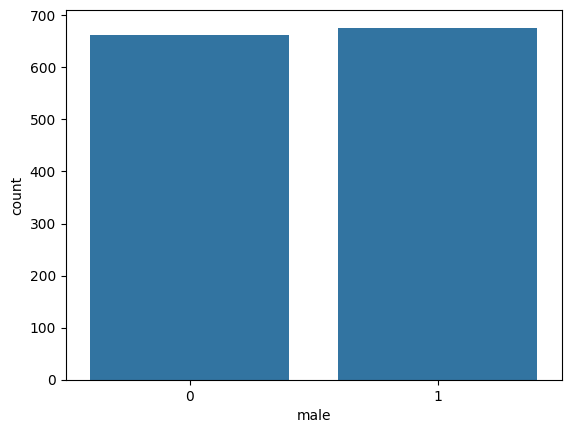

In [248]:
sns.countplot(x="male", data=df)

<Axes: xlabel='male', ylabel='charges'>

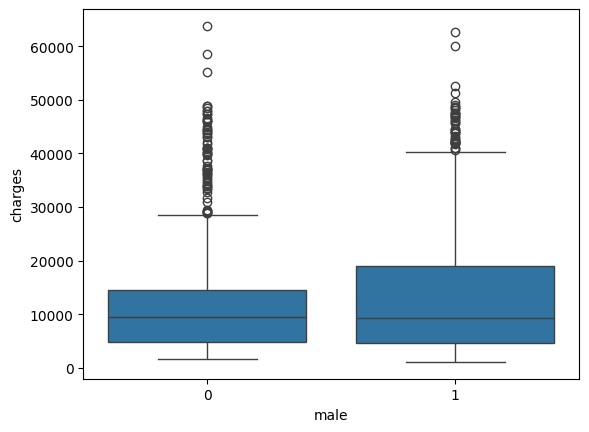

In [249]:
sns.boxplot(x="male", y="charges", data=df)

From here we can see males are getting higher insurance. But there are some outliers

<Axes: xlabel='male', ylabel='charges'>

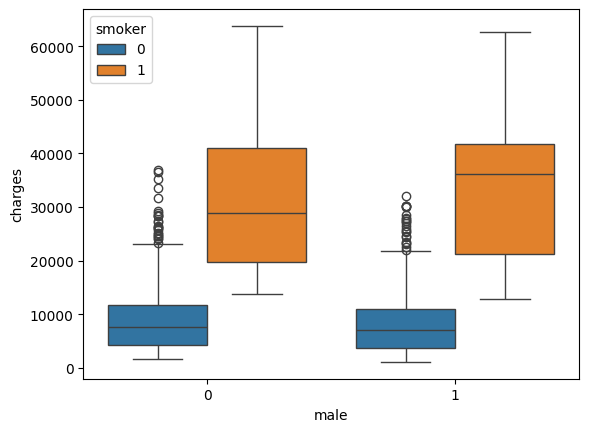

In [250]:
sns.boxplot(x="male", y="charges", data=df, hue="smoker")

Now we can understand the reason of the outliers. Smokers are getting more insurance as smoking are leading to health disease

<Axes: xlabel='age', ylabel='charges'>

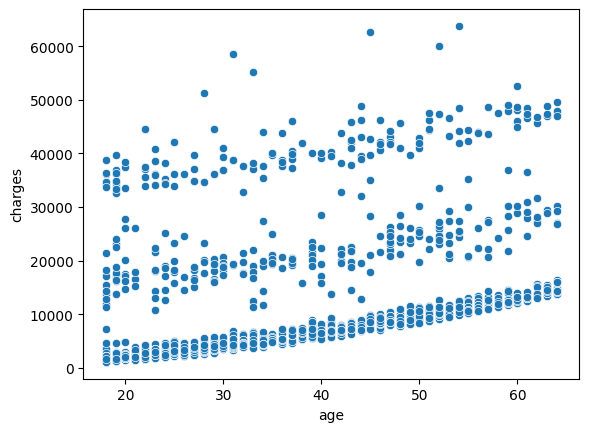

In [251]:
sns.scatterplot(x="age", y="charges", data=df)

We can see insurance prices are increasing with the increment of age but there are a lot of variations. Let's explore this

<Axes: xlabel='age', ylabel='charges'>

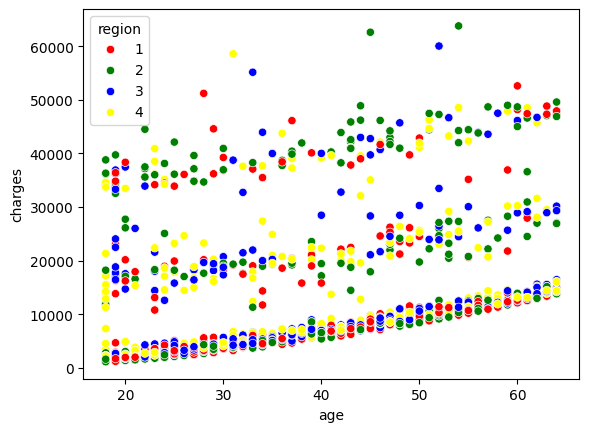

In [252]:
sns.scatterplot(x="age", y="charges", data=df, hue="region", palette=["red","green","blue","yellow"])

We can see that region is well distributed there is no bias in the region

<Axes: xlabel='age', ylabel='charges'>

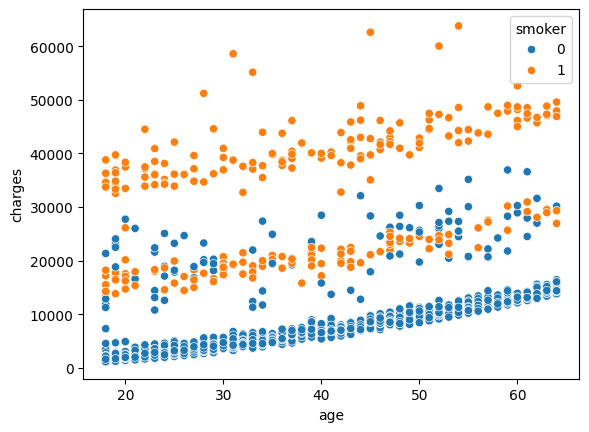

In [253]:
sns.scatterplot(x="age", y="charges", data=df, hue="smoker")

Now we can clearly see the reason of the variation, smokers are taking more costly insurance

<Axes: >

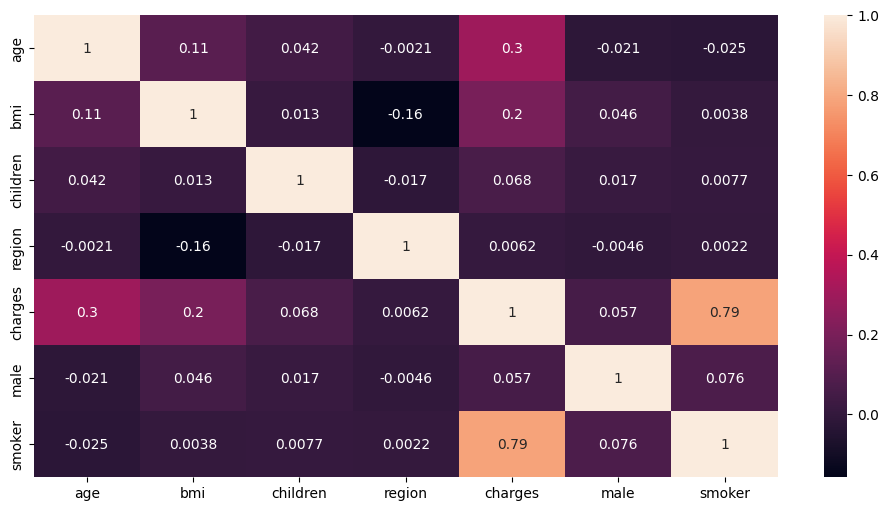

In [254]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

We can see age, bmi and smoker has a higher correlation on insurance charges

## Spliting the data

In [255]:
x = df[["age","bmi","smoker"]].values
y = df["charges"].values

x

array([[19.  , 27.9 ,  1.  ],
       [18.  , 33.77,  0.  ],
       [28.  , 33.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  1.  ]])

In [256]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [257]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_test

array([[45.   , 25.175,  0.   ],
       [36.   , 30.02 ,  0.   ],
       [64.   , 26.885,  1.   ],
       ...,
       [18.   , 28.215,  0.   ],
       [58.   , 36.08 ,  0.   ],
       [20.   , 22.   ,  0.   ]])

## Preprocessing

In [258]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_test

array([[ 0.41103487, -0.8954835 , -0.51298918],
       [-0.22651949, -0.08703981, -0.51298918],
       [ 1.75698298, -0.61015044,  1.94935887],
       ...,
       [-1.50162823, -0.38822472, -0.51298918],
       [ 1.33194673,  0.92414053, -0.51298918],
       [-1.35994948, -1.42526858, -0.51298918]])

## Support Vector Regression Model

In [259]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred

array([9475.88288217, 9387.60278325, 9621.25989502, 9485.60719498,
       9612.22186622, 9494.44576207, 9407.59362853, 9629.04932611,
       9461.52613965, 9522.45368322, 9621.99615103, 9436.93919057,
       9349.99796802, 9601.53953439, 9602.80974273, 9620.92065289,
       9560.61290659, 9633.27188301, 9486.9500416 , 9643.84740809,
       9376.73775821, 9468.56643604, 9365.85379252, 9443.64459863,
       9531.90970433, 9585.8649186 , 9626.59058571, 9348.60750256,
       9496.40907229, 9370.29055983, 9422.63751323, 9608.00372913,
       9386.9487093 , 9427.74626297, 9347.26751839, 9529.5894482 ,
       9365.07900542, 9456.71644335, 9629.55031209, 9632.59574517,
       9365.22770082, 9357.65984831, 9604.37762037, 9597.72979188,
       9410.23979551, 9607.11899321, 9375.48263874, 9372.63786746,
       9635.21673036, 9433.49628778, 9633.36914117, 9369.67118918,
       9507.62268465, 9379.83995996, 9604.26879171, 9544.82601304,
       9365.89465573, 9628.90847581, 9616.56032151, 9578.19916

In [260]:
y_test

array([ 9095.06825 ,  5272.1758  , 29330.98315 ,  9301.89355 ,
       33750.2918  ,  4536.259   ,  2117.33885 , 14210.53595 ,
        3732.6251  , 10264.4421  , 18259.216   ,  7256.7231  ,
        3947.4131  , 46151.1245  , 48673.5588  , 44202.6536  ,
        9800.8882  , 42969.8527  ,  8233.0975  , 21774.32215 ,
        5080.096   ,  7441.501   ,  1256.299   ,  2755.02095 ,
       11085.5868  , 10923.9332  , 12644.589   , 18804.7524  ,
        9715.841   ,  1131.5066  , 15828.82173 , 11842.62375 ,
        2020.5523  ,  5693.4305  ,  2904.088   ,  7448.40395 ,
        2597.779   ,  7337.748   , 23887.6627  , 38709.176   ,
        4687.797   ,  2643.2685  , 11674.13    , 12124.9924  ,
        4889.9995  , 12333.828   ,  3579.8287  ,  4391.652   ,
       42124.5153  ,  4463.2051  , 13887.204   ,  1719.4363  ,
       28476.73499 ,  1708.92575 , 10594.2257  , 25333.33284 ,
        3645.0894  , 38746.3551  , 11848.141   , 10564.8845  ,
       13880.949   ,  4753.6368  , 27941.28758 ,  8017.

## Error Calculation

In [261]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test)

157325717.36381078

## Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


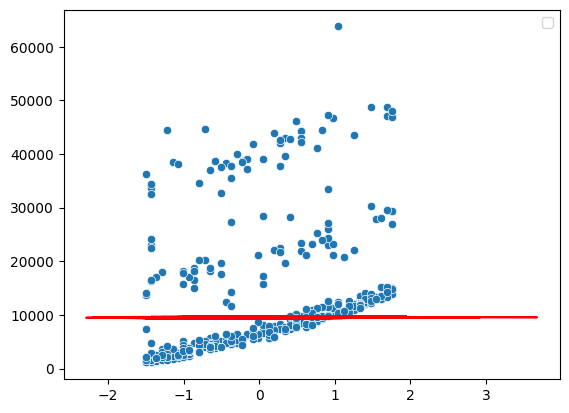

In [262]:
# plt.plot(x_test, y_test,"+",color="blue", label="Actual Data")
sns.scatterplot(x = x_test[:, 0], y=y_test)
plt.plot(x_test, y_pred,color="red")
plt.legend()
plt.show()